### **Mall Customer**
#### Import libraries

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

#### Read dataset

In [42]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
df = df.drop(columns="CustomerID")

In [45]:
df.value_counts("Gender")

Gender
Female    112
Male       88
Name: count, dtype: int64

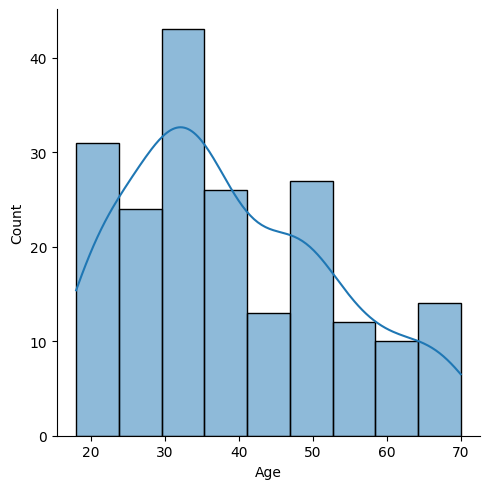

In [46]:
sns.displot(x="Age", data=df, kde=True)

In [47]:
df["Age"].mean()

np.float64(38.85)

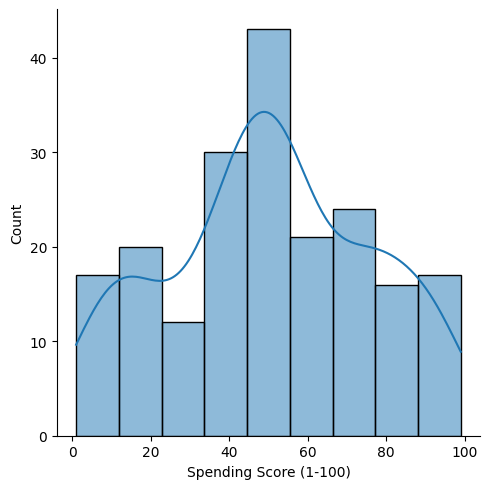

In [48]:
sns.displot(x="Spending Score (1-100)", data=df, kde=True)

<Axes: xlabel='Gender', ylabel='count'>

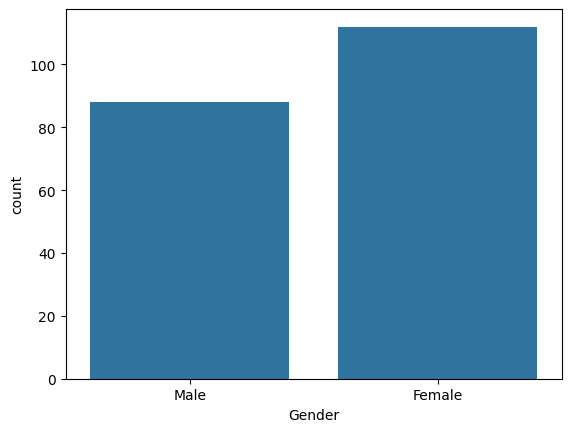

In [49]:
sns.countplot(x="Gender", data=df)

In [ ]:
# This code converts categorical columns into numerical dummy variables, resets 
# the DataFrame's index, and then displays the first few rows of the result.

df = pd.get_dummies(df).reset_index(drop=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


<Axes: >

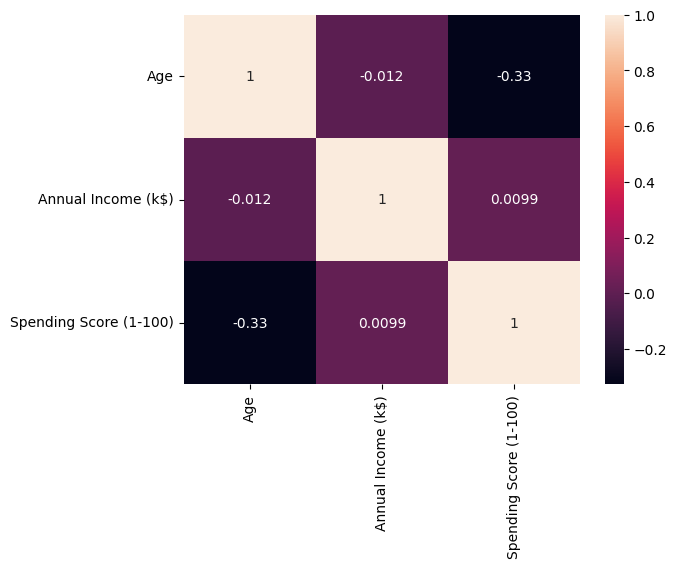

In [ ]:
# This code generates a heatmap to visualize the correlation matrix of 
# all numerical columns in the DataFrame.
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True)

#### Kmeans implementation

In [ ]:
# This code converts the entire pandas DataFrame df into a NumPy array.
x = df.iloc[:,].values
x

array([[19, 15, 39, False, True],
       [21, 15, 81, False, True],
       [20, 16, 6, True, False],
       [23, 16, 77, True, False],
       [31, 17, 40, True, False],
       [22, 17, 76, True, False],
       [35, 18, 6, True, False],
       [23, 18, 94, True, False],
       [64, 19, 3, False, True],
       [30, 19, 72, True, False],
       [67, 19, 14, False, True],
       [35, 19, 99, True, False],
       [58, 20, 15, True, False],
       [24, 20, 77, True, False],
       [37, 20, 13, False, True],
       [22, 20, 79, False, True],
       [35, 21, 35, True, False],
       [20, 21, 66, False, True],
       [52, 23, 29, False, True],
       [35, 23, 98, True, False],
       [35, 24, 35, False, True],
       [25, 24, 73, False, True],
       [46, 25, 5, True, False],
       [31, 25, 73, False, True],
       [54, 28, 14, True, False],
       [29, 28, 82, False, True],
       [45, 28, 32, True, False],
       [35, 28, 61, False, True],
       [40, 29, 31, True, False],
       [23, 29, 87

#### Elbow method

In [ ]:
# Here, we are running K-Means for a range of 1 to 10 clusters 
# and storing the inertia (WCSS) for each run to create an elbow plot.

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[308911.34,
 221185.68749999997,
 158843.47192312015,
 104463.19922884135,
 97309.11432057478,
 68373.70057963196,
 51545.36004489688,
 44734.44301948052,
 42176.29238134237,
 38473.22040038677]

Text(0, 0.5, 'WCSS')

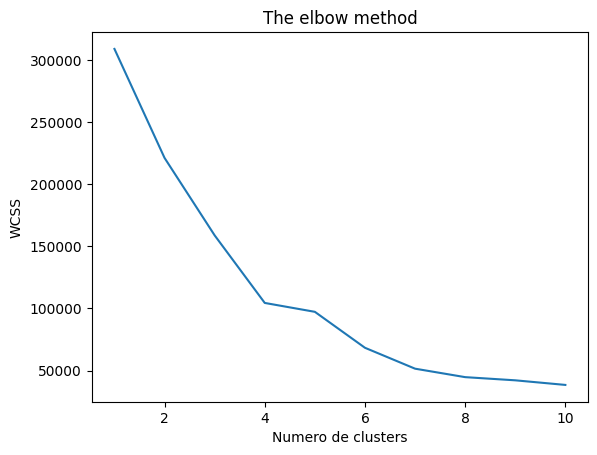

In [57]:
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS")

In [ ]:
# Now we are finalizing the model with 4 clusters and
#  getting the cluster label for each data point.

kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

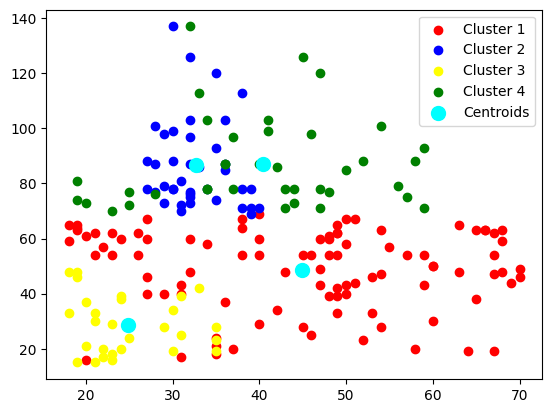

In [ ]:
# I'm now plotting each of the 4 clusters in a different color, 
# adding the centroids, and showing a legend to make it all clear.

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c="red", label="Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c="blue", label="Cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c="yellow", label="Cluster 3")
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c="green", label="Cluster 4")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="cyan", label="Centroids")
plt.legend()

#### DBSCAN

In [ ]:
# we are scaling the features with StandardScaler to
#  make sure they all have a similar range, which is important for 
# distance-based algorithms like DBSCAN.

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# Now I'm setting my DBSCAN parameters and running the algorithm 
# on the scaled data to get the cluster assignments.

dbscan = DBSCAN(eps=0.9, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)


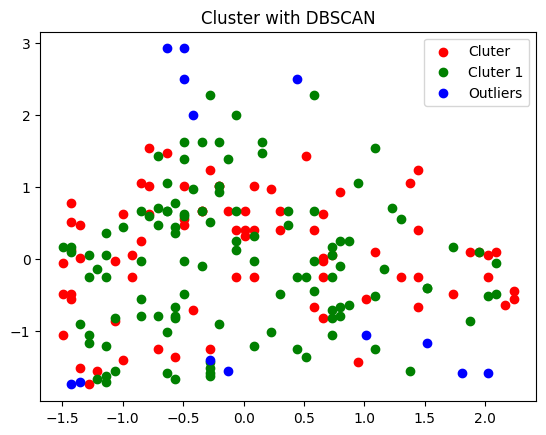

In [ ]:
# Now we are visualizing the DBSCAN results, plotting 
# the clusters and the outliers in different colors to see how it all turned out.

plt.scatter(X_scaled[y_dbscan == 0, 0], X_scaled[y_dbscan == 0, 1], c="red", label="Cluter")
plt.scatter(X_scaled[y_dbscan == 1, 0], X_scaled[y_dbscan == 1, 1], c="green", label="Cluter 1")
plt.scatter(X_scaled[y_dbscan == -1, 0], X_scaled[y_dbscan == -1, 1], c="blue", label="Outliers")
plt.title("Cluster with DBSCAN")
plt.legend()